In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [12]:
X = np.sort(np.random.rand(n_samples))
X

array([ 0.01852179,  0.03183893,  0.05433799,  0.05802916,  0.16469416,
        0.18619301,  0.19999652,  0.20984375,  0.22392469,  0.22741463,
        0.23789282,  0.25435648,  0.311945  ,  0.34535168,  0.39822106,
        0.43441663,  0.49045881,  0.52103661,  0.5356328 ,  0.57722859,
        0.58990998,  0.61396596,  0.6214784 ,  0.7044144 ,  0.73012203,
        0.7395508 ,  0.7936977 ,  0.92808129,  0.934214  ,  0.94437239])

In [13]:
y = true_fun(X) + np.random.randn(n_samples) * 0.1
y

array([ 1.10885694,  0.88077233,  0.85264807,  0.91906132,  0.66384562,
        0.83209545,  0.68274058,  0.55839321,  0.37049259,  0.56309828,
        0.33472141,  0.20916029,  0.21942258, -0.02491059, -0.2089476 ,
       -0.42666029, -0.58892702, -0.83872034, -0.9187629 , -0.84433032,
       -1.01563496, -1.03827522, -1.02296608, -0.98247275, -0.99102316,
       -1.07909084, -0.89047607, -0.55479859, -0.24254428, -0.41935277])

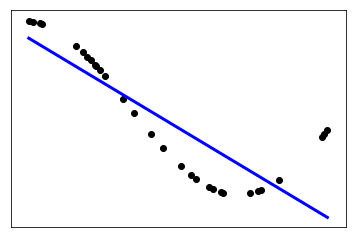

In [20]:
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X.reshape(-1, 1), y)
y_t = regr.predict(X.reshape(-1, 1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(X.reshape(-1, 1), true_fun(X),  color='black')
plt.plot(X.reshape(-1, 1), y_t, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

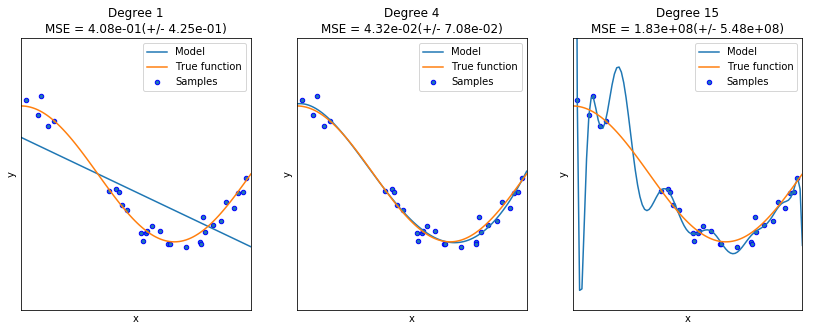

In [4]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()